In [1]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import cPickle as pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
TARGET_COLS=['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',"clean"]

from sklearn.model_selection import train_test_split


## UNIGRAMS - See this everyother code is same

In [2]:
import pandas as pd
target_x=pickle.load(open("target_x1_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)


[[ 647  138]
 [ 935 2125]]
             precision    recall  f1-score   support

          0       0.41      0.82      0.55       785
          1       0.94      0.69      0.80      3060

avg / total       0.83      0.72      0.75      3845



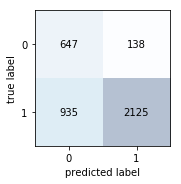

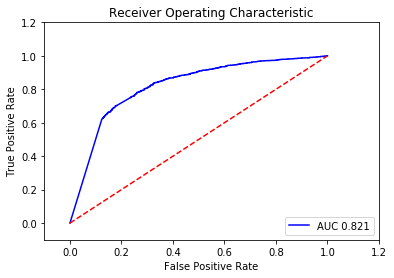

[[1934 1598]
 [  56  257]]
             precision    recall  f1-score   support

          0       0.97      0.55      0.70      3532
          1       0.14      0.82      0.24       313

avg / total       0.90      0.57      0.66      3845



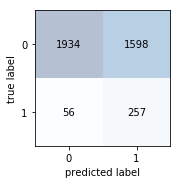

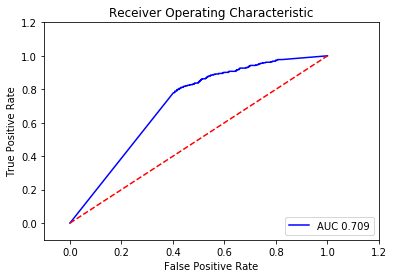

[[1412  680]
 [ 422 1331]]
             precision    recall  f1-score   support

          0       0.77      0.67      0.72      2092
          1       0.66      0.76      0.71      1753

avg / total       0.72      0.71      0.71      3845



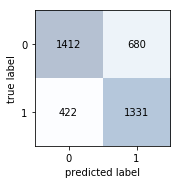

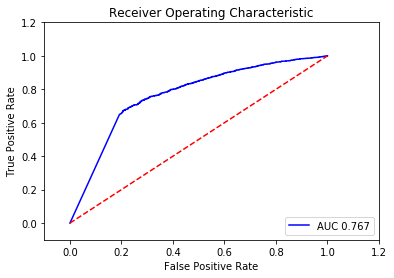

[[1643 2111]
 [  18   73]]
             precision    recall  f1-score   support

          0       0.99      0.44      0.61      3754
          1       0.03      0.80      0.06        91

avg / total       0.97      0.45      0.59      3845



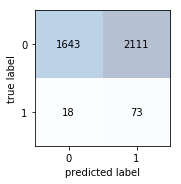

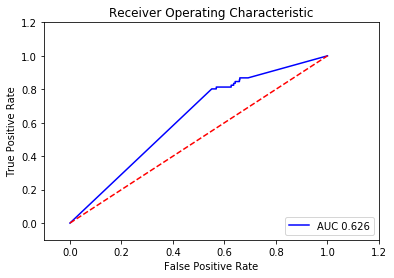

[[1452  813]
 [ 463 1117]]
             precision    recall  f1-score   support

          0       0.76      0.64      0.69      2265
          1       0.58      0.71      0.64      1580

avg / total       0.68      0.67      0.67      3845



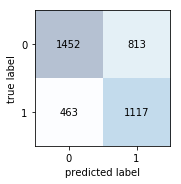

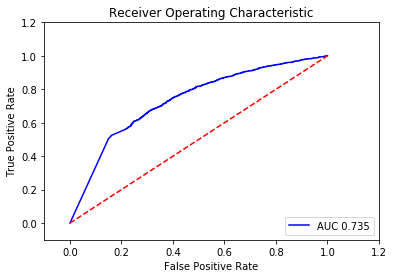

[[1705 1877]
 [  57  206]]
             precision    recall  f1-score   support

          0       0.97      0.48      0.64      3582
          1       0.10      0.78      0.18       263

avg / total       0.91      0.50      0.61      3845



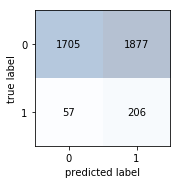

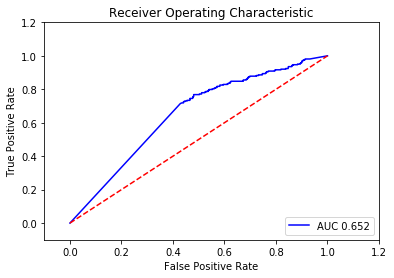

[[2273  956]
 [  27  589]]
             precision    recall  f1-score   support

      False       0.99      0.70      0.82      3229
       True       0.38      0.96      0.55       616

avg / total       0.89      0.74      0.78      3845



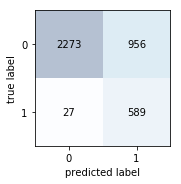

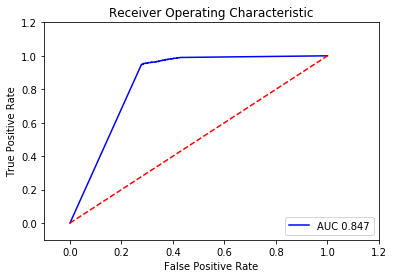

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## BIGRAMS

In [4]:
target_x=pickle.load(open("target_x2_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 770   15]
 [2720  340]]
             precision    recall  f1-score   support

          0       0.22      0.98      0.36       785
          1       0.96      0.11      0.20      3060

avg / total       0.81      0.29      0.23      3845



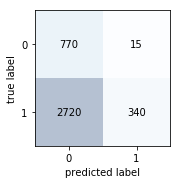

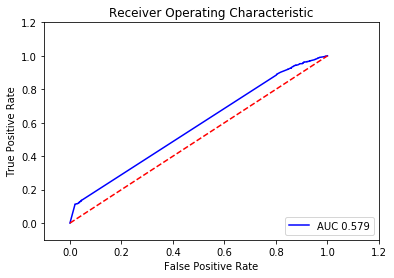

[[ 504 3026]
 [  21  294]]
             precision    recall  f1-score   support

          0       0.96      0.14      0.25      3530
          1       0.09      0.93      0.16       315

avg / total       0.89      0.21      0.24      3845



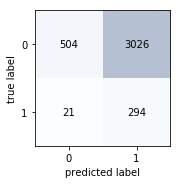

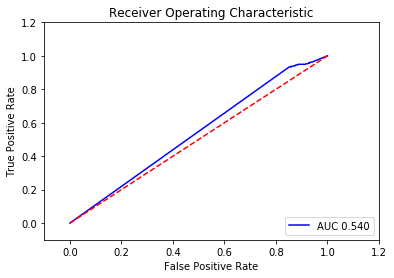

[[2097   40]
 [1410  298]]
             precision    recall  f1-score   support

          0       0.60      0.98      0.74      2137
          1       0.88      0.17      0.29      1708

avg / total       0.72      0.62      0.54      3845



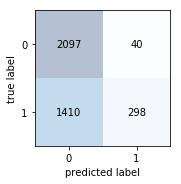

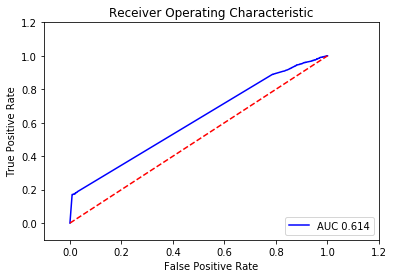

[[ 502 3250]
 [   4   89]]
             precision    recall  f1-score   support

          0       0.99      0.13      0.24      3752
          1       0.03      0.96      0.05        93

avg / total       0.97      0.15      0.23      3845



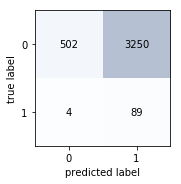

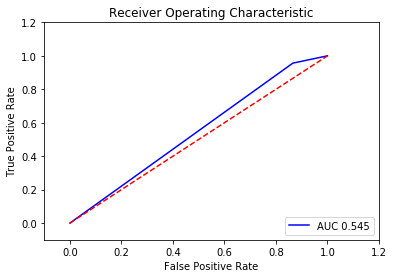

[[2116  126]
 [1323  280]]
             precision    recall  f1-score   support

          0       0.62      0.94      0.74      2242
          1       0.69      0.17      0.28      1603

avg / total       0.65      0.62      0.55      3845



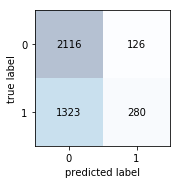

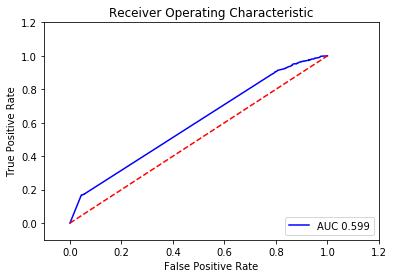

[[ 383 3216]
 [  12  234]]
             precision    recall  f1-score   support

          0       0.97      0.11      0.19      3599
          1       0.07      0.95      0.13       246

avg / total       0.91      0.16      0.19      3845



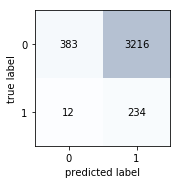

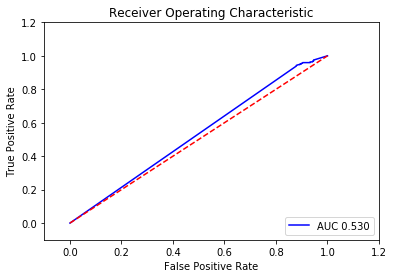

[[ 363 2864]
 [   1  617]]
             precision    recall  f1-score   support

      False       1.00      0.11      0.20      3227
       True       0.18      1.00      0.30       618

avg / total       0.87      0.25      0.22      3845



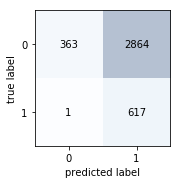

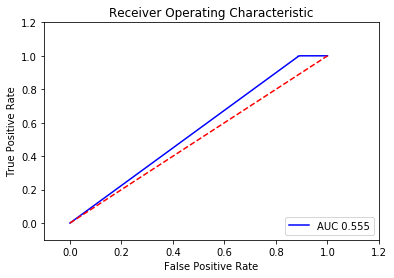

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## CHARNGRAM

In [6]:
target_x=pickle.load(open("target_x3_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 607  178]
 [ 638 2422]]
             precision    recall  f1-score   support

          0       0.49      0.77      0.60       785
          1       0.93      0.79      0.86      3060

avg / total       0.84      0.79      0.80      3845



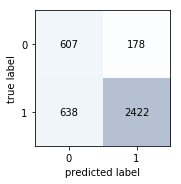

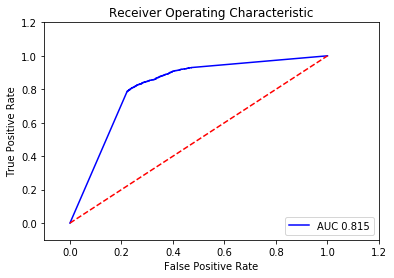

[[2677  838]
 [ 118  212]]
             precision    recall  f1-score   support

          0       0.96      0.76      0.85      3515
          1       0.20      0.64      0.31       330

avg / total       0.89      0.75      0.80      3845



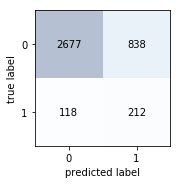

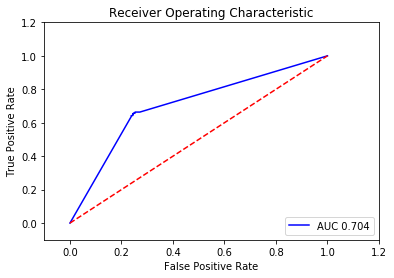

[[1657  526]
 [ 497 1165]]
             precision    recall  f1-score   support

          0       0.77      0.76      0.76      2183
          1       0.69      0.70      0.69      1662

avg / total       0.73      0.73      0.73      3845



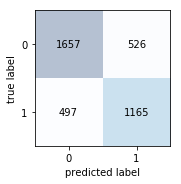

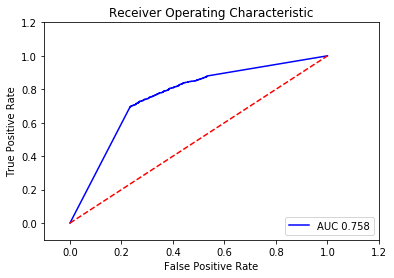

[[3153  589]
 [  65   38]]
             precision    recall  f1-score   support

          0       0.98      0.84      0.91      3742
          1       0.06      0.37      0.10       103

avg / total       0.96      0.83      0.88      3845



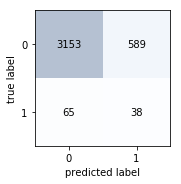

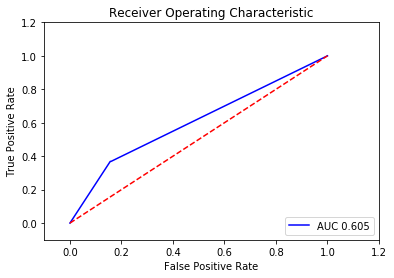

[[1605  695]
 [ 556  989]]
             precision    recall  f1-score   support

          0       0.74      0.70      0.72      2300
          1       0.59      0.64      0.61      1545

avg / total       0.68      0.67      0.68      3845



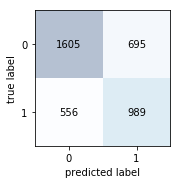

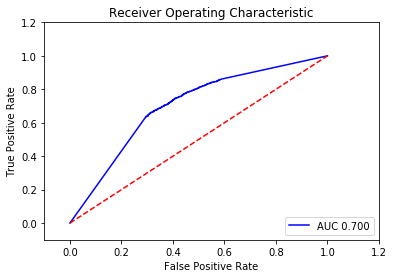

[[2440 1126]
 [ 121  158]]
             precision    recall  f1-score   support

          0       0.95      0.68      0.80      3566
          1       0.12      0.57      0.20       279

avg / total       0.89      0.68      0.75      3845



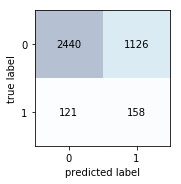

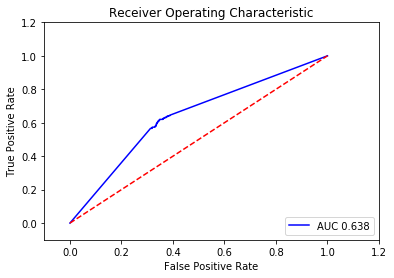

[[2877  378]
 [  78  512]]
             precision    recall  f1-score   support

      False       0.97      0.88      0.93      3255
       True       0.58      0.87      0.69       590

avg / total       0.91      0.88      0.89      3845



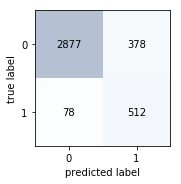

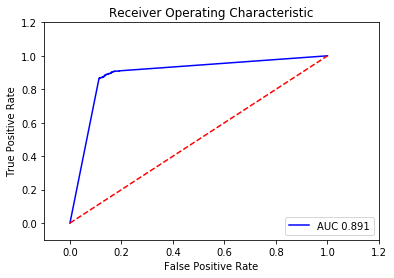

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## SELECTED FEATURES

In [8]:
target_x=pickle.load(open("target_x4_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 768   17]
 [2840  220]]
             precision    recall  f1-score   support

          0       0.21      0.98      0.35       785
          1       0.93      0.07      0.13      3060

avg / total       0.78      0.26      0.18      3845



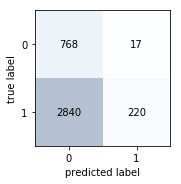

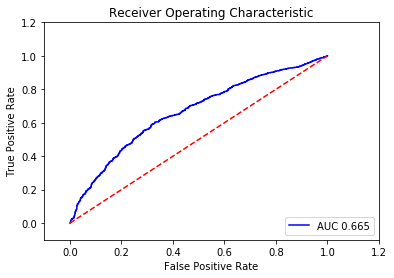

[[3474   54]
 [ 292   25]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      3528
          1       0.32      0.08      0.13       317

avg / total       0.87      0.91      0.88      3845



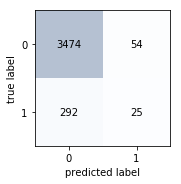

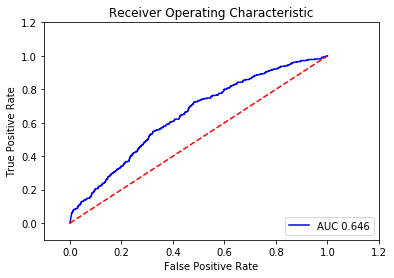

[[2088   29]
 [1684   44]]
             precision    recall  f1-score   support

          0       0.55      0.99      0.71      2117
          1       0.60      0.03      0.05      1728

avg / total       0.58      0.55      0.41      3845



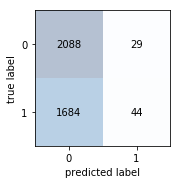

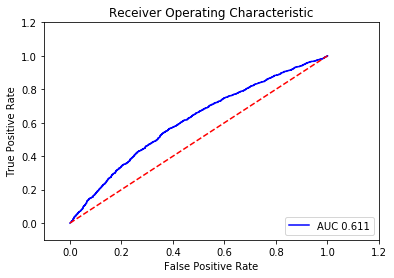

[[3719   33]
 [  91    2]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      3752
          1       0.06      0.02      0.03        93

avg / total       0.95      0.97      0.96      3845



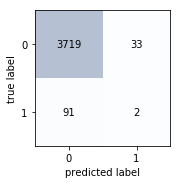

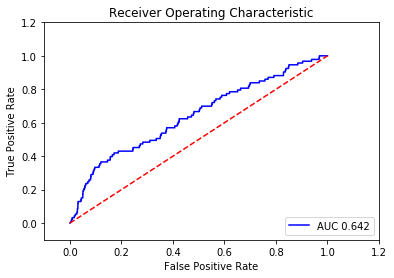

[[2240   23]
 [1553   29]]
             precision    recall  f1-score   support

          0       0.59      0.99      0.74      2263
          1       0.56      0.02      0.04      1582

avg / total       0.58      0.59      0.45      3845



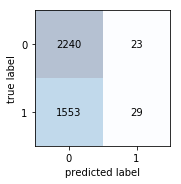

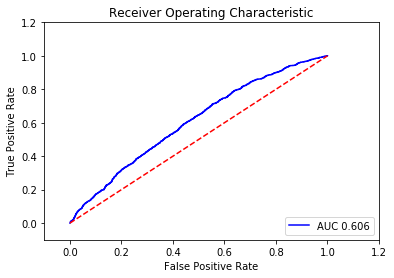

[[3535   49]
 [ 257    4]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      3584
          1       0.08      0.02      0.03       261

avg / total       0.87      0.92      0.90      3845



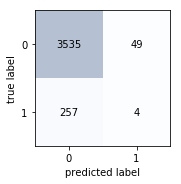

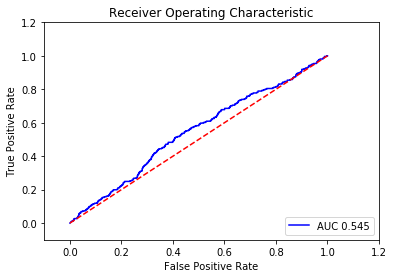

[[ 278 2991]
 [  14  562]]
             precision    recall  f1-score   support

      False       0.95      0.09      0.16      3269
       True       0.16      0.98      0.27       576

avg / total       0.83      0.22      0.17      3845



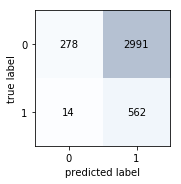

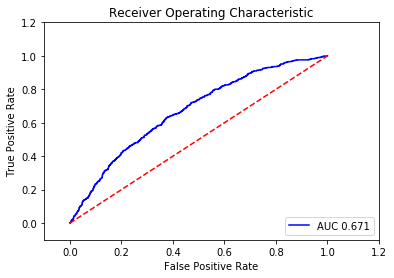

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## WORDVECTORS - GLOVE

In [10]:
target_x=pickle.load(open("target_x5_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

print(target_x.shape)
print
X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

(19225L, 50L)



[[ 650  158]
 [1856 1181]]
             precision    recall  f1-score   support

          0       0.26      0.80      0.39       808
          1       0.88      0.39      0.54      3037

avg / total       0.75      0.48      0.51      3845



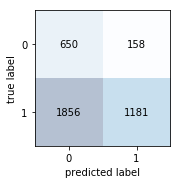

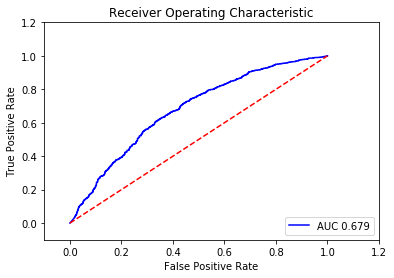

[[3154  377]
 [ 212  102]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      3531
          1       0.21      0.32      0.26       314

avg / total       0.88      0.85      0.86      3845



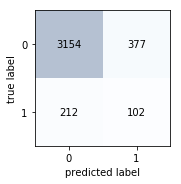

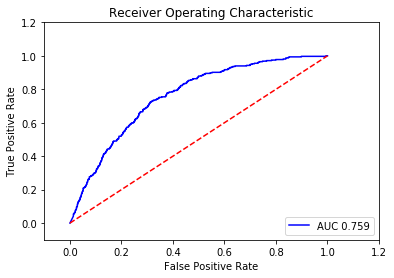

[[1827  306]
 [ 990  722]]
             precision    recall  f1-score   support

          0       0.65      0.86      0.74      2133
          1       0.70      0.42      0.53      1712

avg / total       0.67      0.66      0.64      3845



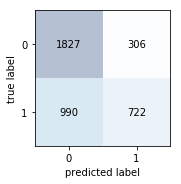

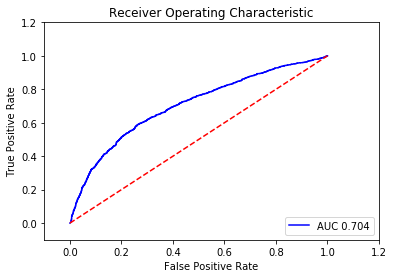

[[2108 1653]
 [  44   40]]
             precision    recall  f1-score   support

          0       0.98      0.56      0.71      3761
          1       0.02      0.48      0.05        84

avg / total       0.96      0.56      0.70      3845



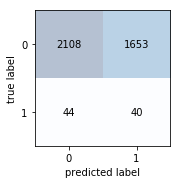

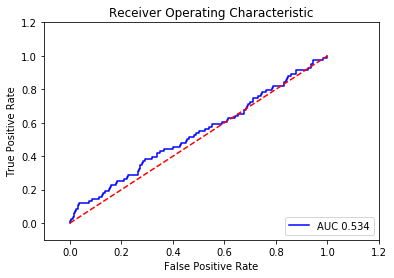

[[1514  759]
 [ 612  960]]
             precision    recall  f1-score   support

          0       0.71      0.67      0.69      2273
          1       0.56      0.61      0.58      1572

avg / total       0.65      0.64      0.65      3845



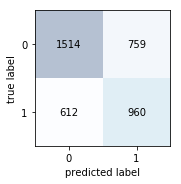

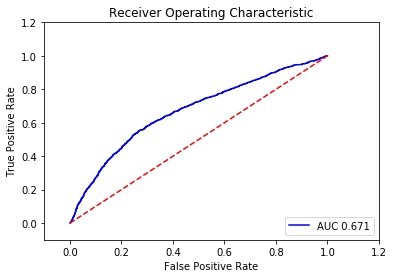

[[1479 2084]
 [  81  201]]
             precision    recall  f1-score   support

          0       0.95      0.42      0.58      3563
          1       0.09      0.71      0.16       282

avg / total       0.88      0.44      0.55      3845



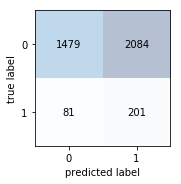

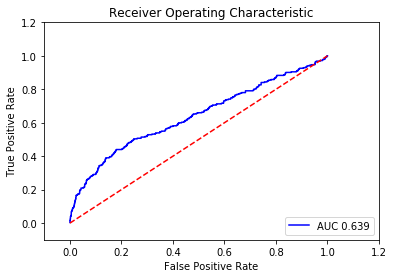

[[2152 1103]
 [ 189  401]]
             precision    recall  f1-score   support

      False       0.92      0.66      0.77      3255
       True       0.27      0.68      0.38       590

avg / total       0.82      0.66      0.71      3845



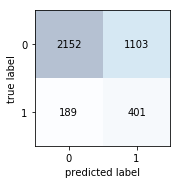

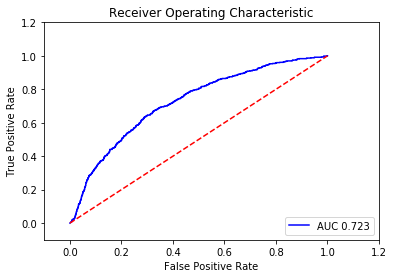

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
#     X_train=(pd.DataFrame(X_train.toarray()))
#     X_valid=(pd.DataFrame(X_valid.toarray()))
#     if i==0:
#         dfindex=((X_valid).iloc[:,0])
#     X_train=X_train.drop(X_train.columns[[0]], axis=1)
#     X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_charngrams,train_unigrams,train_feats[SELECTED_COLS])).tocsr()

In [13]:
target_x=pickle.load(open("target_x6_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 644  141]
 [ 744 2316]]
             precision    recall  f1-score   support

          0       0.46      0.82      0.59       785
          1       0.94      0.76      0.84      3060

avg / total       0.84      0.77      0.79      3845



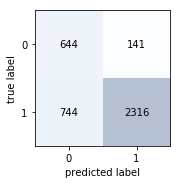

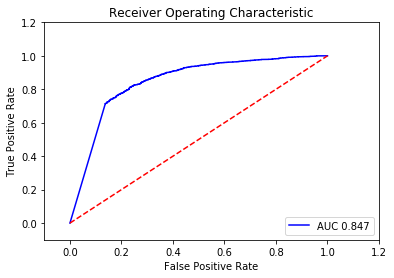

[[1531 1986]
 [  25  303]]
             precision    recall  f1-score   support

          0       0.98      0.44      0.60      3517
          1       0.13      0.92      0.23       328

avg / total       0.91      0.48      0.57      3845



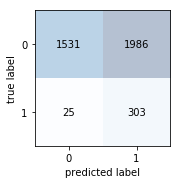

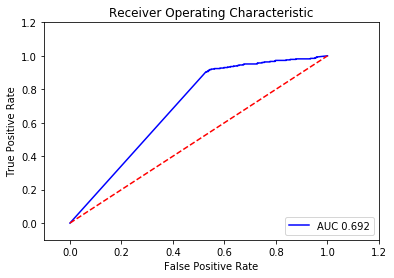

[[1372  789]
 [ 262 1422]]
             precision    recall  f1-score   support

          0       0.84      0.63      0.72      2161
          1       0.64      0.84      0.73      1684

avg / total       0.75      0.73      0.73      3845



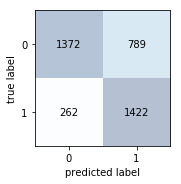

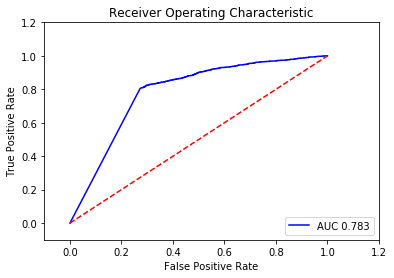

[[1818 1932]
 [  12   83]]
             precision    recall  f1-score   support

          0       0.99      0.48      0.65      3750
          1       0.04      0.87      0.08        95

avg / total       0.97      0.49      0.64      3845



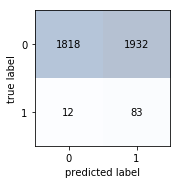

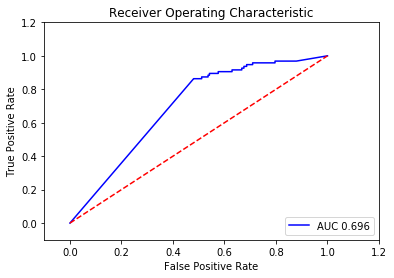

[[1259  984]
 [ 255 1347]]
             precision    recall  f1-score   support

          0       0.83      0.56      0.67      2243
          1       0.58      0.84      0.68      1602

avg / total       0.73      0.68      0.68      3845



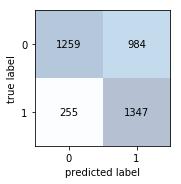

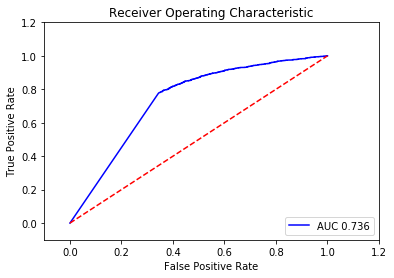

[[1460 2117]
 [  23  245]]
             precision    recall  f1-score   support

          0       0.98      0.41      0.58      3577
          1       0.10      0.91      0.19       268

avg / total       0.92      0.44      0.55      3845



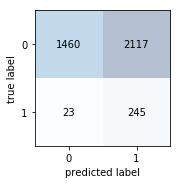

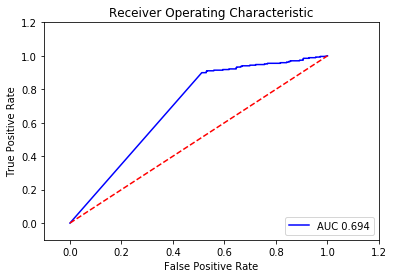

[[2509  702]
 [  46  588]]
             precision    recall  f1-score   support

      False       0.98      0.78      0.87      3211
       True       0.46      0.93      0.61       634

avg / total       0.90      0.81      0.83      3845



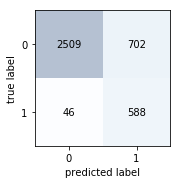

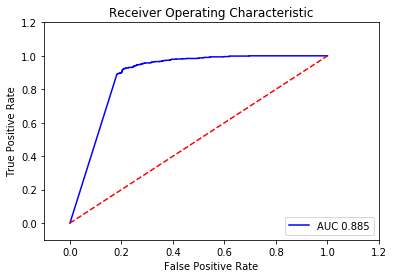

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_unigrams)).tocsr()

In [15]:
target_x=pickle.load(open("target_x7_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 732   53]
 [1519 1541]]
             precision    recall  f1-score   support

          0       0.33      0.93      0.48       785
          1       0.97      0.50      0.66      3060

avg / total       0.84      0.59      0.63      3845



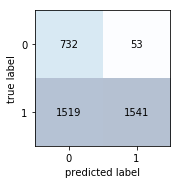

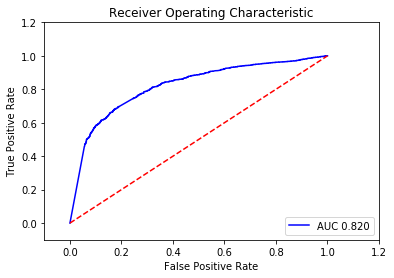

[[1650 1880]
 [  34  281]]
             precision    recall  f1-score   support

          0       0.98      0.47      0.63      3530
          1       0.13      0.89      0.23       315

avg / total       0.91      0.50      0.60      3845



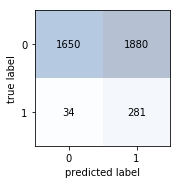

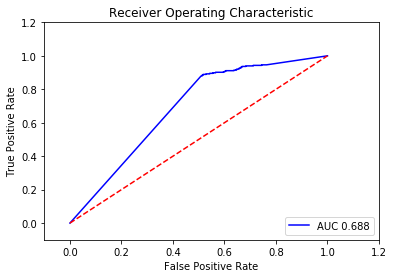

[[2001  130]
 [ 838  876]]
             precision    recall  f1-score   support

          0       0.70      0.94      0.81      2131
          1       0.87      0.51      0.64      1714

avg / total       0.78      0.75      0.73      3845



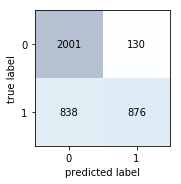

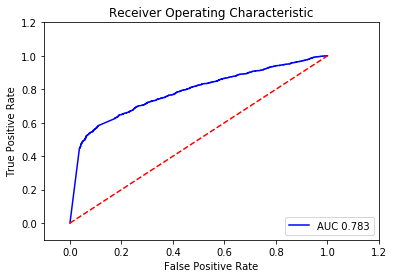

[[1668 2089]
 [  19   69]]
             precision    recall  f1-score   support

          0       0.99      0.44      0.61      3757
          1       0.03      0.78      0.06        88

avg / total       0.97      0.45      0.60      3845



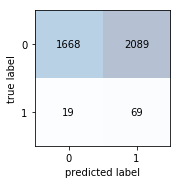

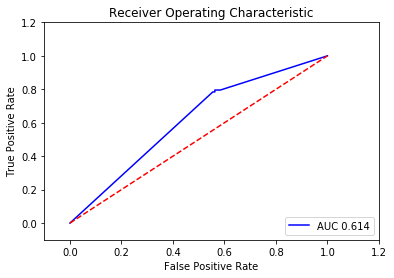

[[1577  694]
 [ 512 1062]]
             precision    recall  f1-score   support

          0       0.75      0.69      0.72      2271
          1       0.60      0.67      0.64      1574

avg / total       0.69      0.69      0.69      3845



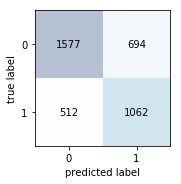

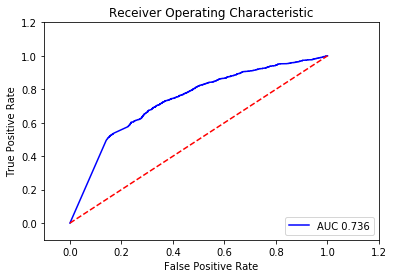

[[1446 2126]
 [  65  208]]
             precision    recall  f1-score   support

          0       0.96      0.40      0.57      3572
          1       0.09      0.76      0.16       273

avg / total       0.90      0.43      0.54      3845



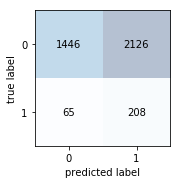

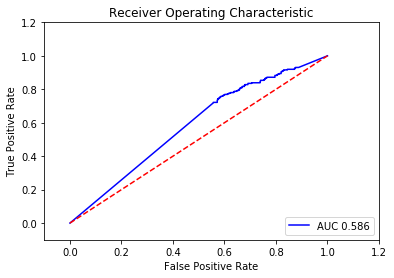

[[2004 1202]
 [  20  619]]
             precision    recall  f1-score   support

      False       0.99      0.63      0.77      3206
       True       0.34      0.97      0.50       639

avg / total       0.88      0.68      0.72      3845



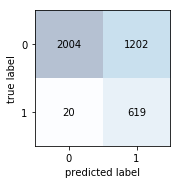

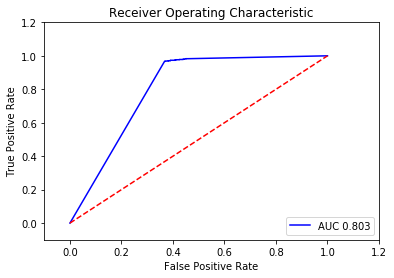

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams)).tocsr()

In [17]:
target_x=pickle.load(open("target_x8_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 610  175]
 [ 603 2457]]
             precision    recall  f1-score   support

          0       0.50      0.78      0.61       785
          1       0.93      0.80      0.86      3060

avg / total       0.85      0.80      0.81      3845



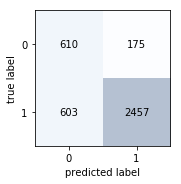

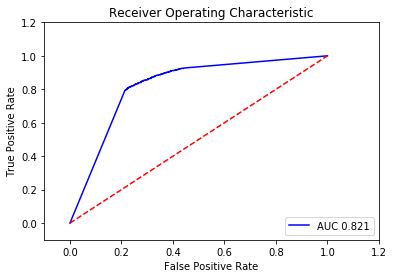

[[2615  921]
 [ 131  178]]
             precision    recall  f1-score   support

          0       0.95      0.74      0.83      3536
          1       0.16      0.58      0.25       309

avg / total       0.89      0.73      0.79      3845



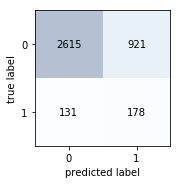

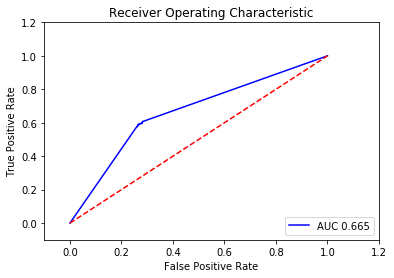

[[1683  532]
 [ 463 1167]]
             precision    recall  f1-score   support

          0       0.78      0.76      0.77      2215
          1       0.69      0.72      0.70      1630

avg / total       0.74      0.74      0.74      3845



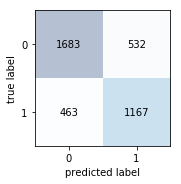

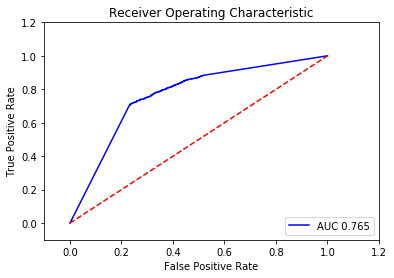

[[3193  549]
 [  78   25]]
             precision    recall  f1-score   support

          0       0.98      0.85      0.91      3742
          1       0.04      0.24      0.07       103

avg / total       0.95      0.84      0.89      3845



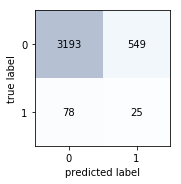

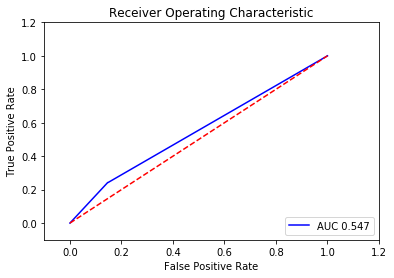

[[1615  641]
 [ 526 1063]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.73      2256
          1       0.62      0.67      0.65      1589

avg / total       0.70      0.70      0.70      3845



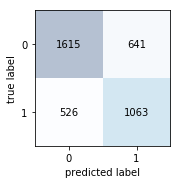

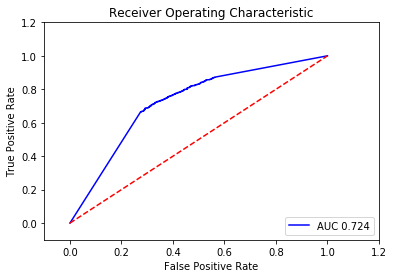

[[2610  964]
 [ 116  155]]
             precision    recall  f1-score   support

          0       0.96      0.73      0.83      3574
          1       0.14      0.57      0.22       271

avg / total       0.90      0.72      0.79      3845



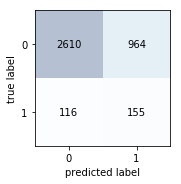

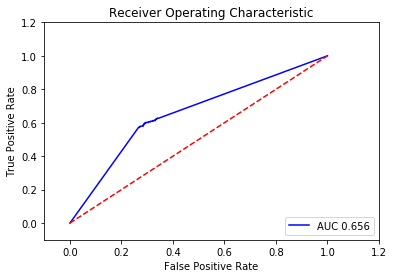

[[2946  305]
 [  77  517]]
             precision    recall  f1-score   support

      False       0.97      0.91      0.94      3251
       True       0.63      0.87      0.73       594

avg / total       0.92      0.90      0.91      3845



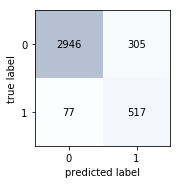

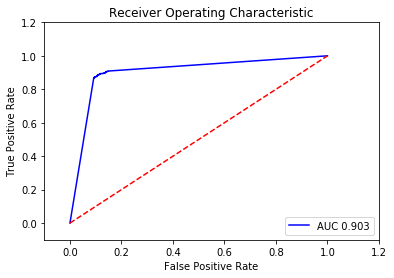

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams,train_bigrams)).tocsr()

In [19]:
target_x=pickle.load(open("target_x9_mlnew.pkl", "rb" ))
target_y=pickle.load(open("target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
y_test.shape

(3076, 7)

[[ 610  175]
 [ 603 2457]]
             precision    recall  f1-score   support

          0       0.50      0.78      0.61       785
          1       0.93      0.80      0.86      3060

avg / total       0.85      0.80      0.81      3845



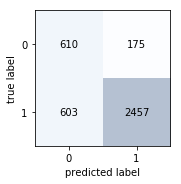

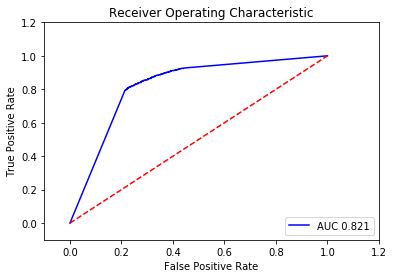

[[2735  796]
 [ 133  181]]
             precision    recall  f1-score   support

          0       0.95      0.77      0.85      3531
          1       0.19      0.58      0.28       314

avg / total       0.89      0.76      0.81      3845



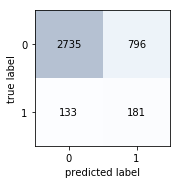

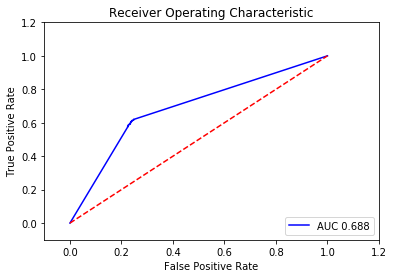

[[1581  542]
 [ 452 1270]]
             precision    recall  f1-score   support

          0       0.78      0.74      0.76      2123
          1       0.70      0.74      0.72      1722

avg / total       0.74      0.74      0.74      3845



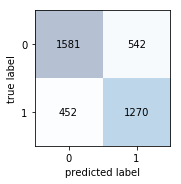

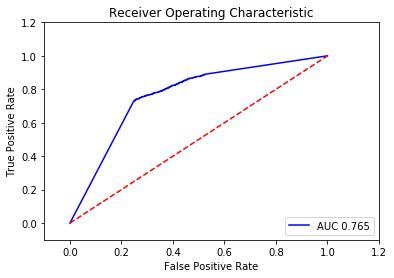

[[3105  656]
 [  43   41]]
             precision    recall  f1-score   support

          0       0.99      0.83      0.90      3761
          1       0.06      0.49      0.10        84

avg / total       0.97      0.82      0.88      3845



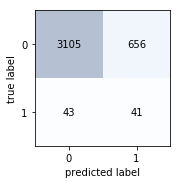

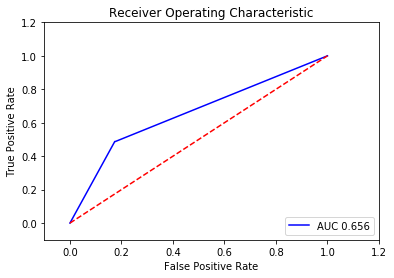

[[1630  624]
 [ 539 1052]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.74      2254
          1       0.63      0.66      0.64      1591

avg / total       0.70      0.70      0.70      3845



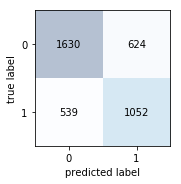

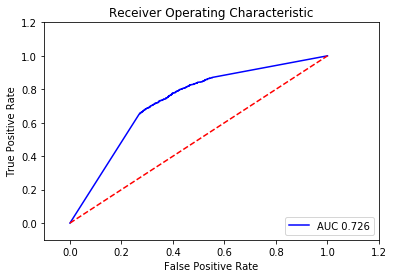

[[2659  948]
 [ 101  137]]
             precision    recall  f1-score   support

          0       0.96      0.74      0.84      3607
          1       0.13      0.58      0.21       238

avg / total       0.91      0.73      0.80      3845



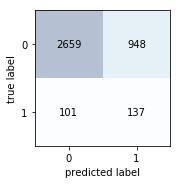

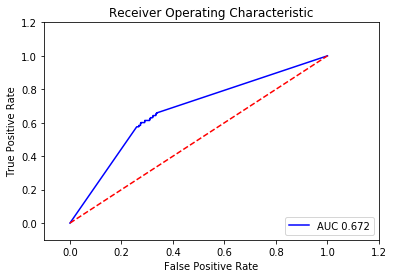

[[2899  313]
 [  88  545]]
             precision    recall  f1-score   support

      False       0.97      0.90      0.94      3212
       True       0.64      0.86      0.73       633

avg / total       0.92      0.90      0.90      3845



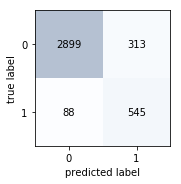

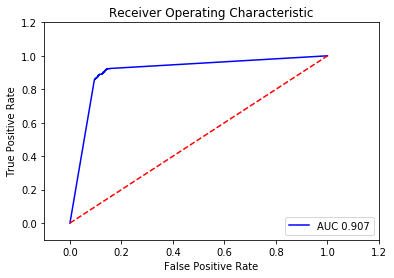

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=GaussianNB()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
dff.to_csv("Final_result.csv")
df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   
